C:\Users\marco\AppData\Local\Temp\ipykernel_12528\1233034531.py:19: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_VGT['Date'] = pd.to_datetime(df_VGT['Date'])


                           Date   Close    High     Low    Open   Volume
0     2004-02-03 00:00:00-05:00  409.70  409.87  408.19  409.87   231100
1     2004-02-04 00:00:00-05:00  398.79  398.79  397.53  397.53    51000
2     2004-02-05 00:00:00-05:00  400.47  400.47  397.53  399.54     2600
3     2004-02-06 00:00:00-05:00  402.15  407.60  402.15  407.60     1000
4     2004-02-09 00:00:00-05:00  408.36  409.62  406.51  407.18     3200
...                         ...     ...     ...     ...     ...      ...
5329  2025-04-08 00:00:00-04:00  499.59  505.50  461.52  470.37  1566300
5330  2025-04-09 00:00:00-04:00  470.71  537.89  470.51  533.78  2101300
5331  2025-04-10 00:00:00-04:00  516.06  519.63  492.26  509.77  1221100
5332  2025-04-11 00:00:00-04:00  506.88  522.10  503.24  520.14   721000
5333  2025-04-14 00:00:00-04:00  536.49  537.27  518.67  522.98   495127

[5334 rows x 6 columns]
El DataFrame df_VGT se ha guardado como 'df_VGT.csv'.


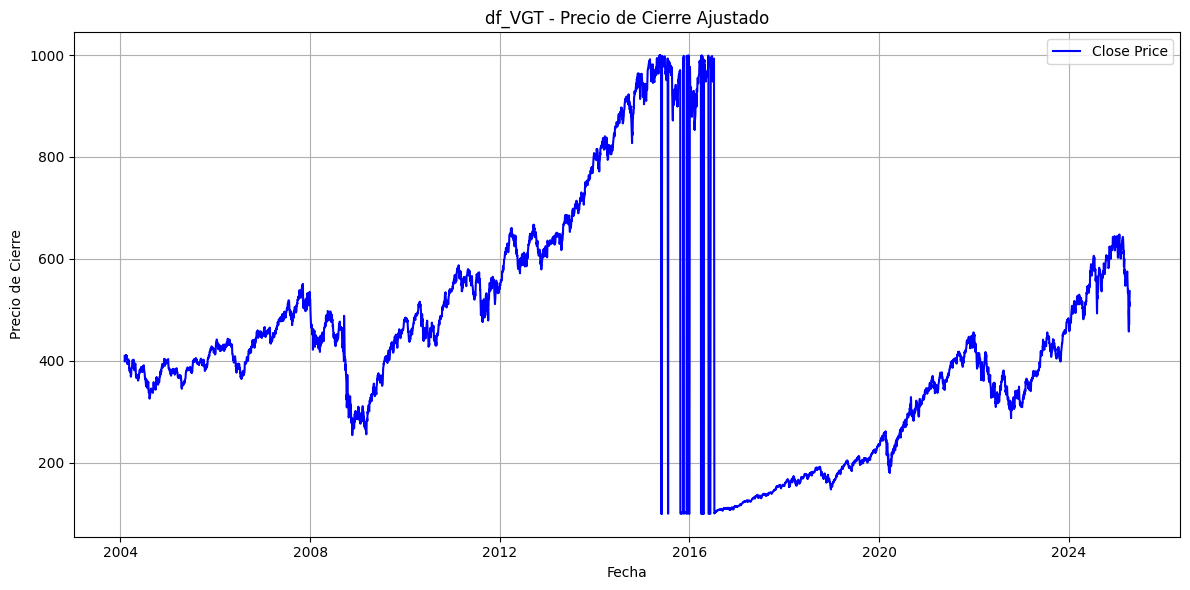

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df_VGT = pd.read_csv('VGT_historico.csv')

# Eliminar las tres últimas columnas del DataFrame
df_VGT = df_VGT.iloc[:, :-3]


# Renombrar las columnas
df_VGT.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Eliminar las filas 0 y 1
df_VGT = df_VGT.drop([0, 1]).reset_index(drop=True)

# Convertir la columna 'Date' al formato datetime
df_VGT['Date'] = pd.to_datetime(df_VGT['Date'])


#Función para dividir valores mayores a 800 entre 10
def adjust_values(value):
    if value <= 250 :
        value /= 10
    return value

# Función para limpiar y escalar los valores numéricos
def clean_and_scale(value):
    # Eliminar separadores de miles (puntos y comas)
    value = str(value).replace('.', '').replace(',', '')
    # Convertir a float
    value = float(value)
    # Escalar el valor para que tenga solo tres números enteros
    while value >= 1000:  # Ajustar la escala si el número tiene más de tres dígitos enteros
        value /= 10
    # Si el valor escalado es mayor o igual a 100, multiplicarlo por 10
    if value < 100:
        value /= 10
    return round(value, 2)  # Redondear a 2 decimales

# Aplicar la función a las columnas numéricas
for col in ['Close', 'High', 'Low', 'Open']:
    df_VGT[col] = df_VGT[col].apply(clean_and_scale)

     #Aplicar la función a las columnas numéricas después de limpiar los datos
for col in ['Close', 'High', 'Low', 'Open']:
    df_VGT[col] = df_VGT[col].apply(adjust_values)

# Mostrar el DataFrame resultante
print(df_VGT)

# Guardar el DataFrame df_VGT en un archivo CSV
#df_VGT.to_csv("df_VGT.csv", sep=';', decimal='.', index=False, encoding='utf-8')

df_VGT.to_csv("df_VGT.csv", sep=';', decimal=',', index=False, encoding='utf-8')

# Confirmación
print("El DataFrame df_VGT se ha guardado como 'df_VGT.csv'.")

# Graficar el precio de cierre (Close) a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_VGT['Date'], df_VGT['Close'], label='Close Price', color='blue')
plt.title('df_VGT - Precio de Cierre Ajustado')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df_VGT = pd.read_csv('VGT_historico.csv')

print(df_VGT.head())

                        Date       Open       High        Low      Close  \
0  2004-01-30 00:00:00-05:00  40.919752  41.339528  40.919752  41.205200   
1  2004-02-02 00:00:00-05:00  41.221986  41.238777  41.003704  41.238777   
2  2004-02-03 00:00:00-05:00  40.970113  40.986904  40.818993  40.986904   
3  2004-02-04 00:00:00-05:00  39.878707  39.878707  39.752773  39.752773   
4  2004-02-05 00:00:00-05:00  40.046621  40.046621  39.752776  39.954269   

   Volume  Dividends  Stock Splits  Capital Gains  
0  117600        0.0           0.0            0.0  
1   65400        0.0           0.0            0.0  
2  231100        0.0           0.0            0.0  
3   51000        0.0           0.0            0.0  
4    2600        0.0           0.0            0.0  


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df_VGT = pd.read_csv('VGT_historico.csv')

# Eliminar las tres últimas columnas del DataFrame
df_VGT = df_VGT.iloc[:, :-3]

# Renombrar las columnas
df_VGT.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Eliminar las filas 0 y 1
df_VGT = df_VGT.drop([0, 1]).reset_index(drop=True)

# Convertir la columna 'Date' al formato datetime
df_VGT['Date'] = pd.to_datetime(df_VGT['Date'])

# Función para limpiar y escalar los valores numéricos
def clean_and_scale(value):
    # Eliminar separadores de miles (puntos y comas)
    value = str(value).replace('.', '').replace(',', '')
    # Convertir a float
    value = float(value)
    # Escalar el valor para que tenga solo tres números enteros
    while value >= 1000:
        value /= 10
    # Si el valor escalado es menor a 100, reducirlo aún más (según tu lógica)
    if value < 100:
        value /= 10
    return round(value, 2)

# Aplicar la función a las columnas numéricas
for col in ['Close', 'High', 'Low', 'Open']:
    df_VGT[col] = df_VGT[col].apply(clean_and_scale)

# Condición: Para filas anteriores al año 2016, 
# si en las columnas Open, High, Low o Close el valor es superior a 250, se divide entre 10.
mask = df_VGT['Date'] < pd.to_datetime("2016-01-01")
for col in ['Open', 'High', 'Low', 'Close']:
    df_VGT.loc[mask & (df_VGT[col] > 250), col] = df_VGT.loc[mask & (df_VGT[col] > 250), col] / 10

# Mostrar las primeras filas para verificar
print(df_VGT.head())
print(df_VGT)

# Guardar el DataFrame en un archivo CSV
df_VGT.to_csv("df_VGT.csv", sep=';', decimal=',', index=False, encoding='utf-8')
print("El DataFrame df_VGT se ha guardado como 'df_VGT.csv'.")

# Graficar el precio de cierre (Close) a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_VGT['Date'], df_VGT['Close'], label='Close Price', color='blue')
plt.title('df_VGT - Precio de Cierre Ajustado')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\marco\AppData\Local\Temp\ipykernel_12528\2427867986.py:18: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_VGT['Date'] = pd.to_datetime(df_VGT['Date'])


TypeError: Cannot compare tz-naive and tz-aware timestamps

In [25]:
print("Nombres de columnas:", df_VGT.columns.tolist())
print(df_VGT['Date'].head())


Nombres de columnas: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
0    2004-02-03 00:00:00-05:00
1    2004-02-04 00:00:00-05:00
2    2004-02-05 00:00:00-05:00
3    2004-02-06 00:00:00-05:00
4    2004-02-09 00:00:00-05:00
Name: Date, dtype: object


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df_VGT = pd.read_csv('VGT_historico.csv')

# Eliminar las tres últimas columnas (si estás seguro de que no las necesitas)
df_VGT = df_VGT.iloc[:, :-3]

# Renombrar las columnas (ajusta estos nombres según corresponda en tu CSV)
df_VGT.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Eliminar las filas 0 y 1 (si se requiere)
df_VGT = df_VGT.drop([0, 1]).reset_index(drop=True)

# Convertir la columna 'Date' al formato datetime con manejo de errores
df_VGT['Date'] = pd.to_datetime(df_VGT['Date'], errors='coerce')

# Verificar la conversión de la columna Date
print("Nombres de columnas:", df_VGT.columns.tolist())
print(df_VGT['Date'].head())



Nombres de columnas: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
0    2004-02-03 00:00:00-05:00
1    2004-02-04 00:00:00-05:00
2    2004-02-05 00:00:00-05:00
3    2004-02-06 00:00:00-05:00
4    2004-02-09 00:00:00-05:00
Name: Date, dtype: object


C:\Users\marco\AppData\Local\Temp\ipykernel_12528\2820048006.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_VGT['Date'] = pd.to_datetime(df_VGT['Date'], errors='coerce')


Tipo de 'Date': datetime64[ns]
0   2004-02-03 05:00:00
1   2004-02-04 05:00:00
2   2004-02-05 05:00:00
3   2004-02-06 05:00:00
4   2004-02-09 05:00:00
Name: Date, dtype: datetime64[ns]
El DataFrame df_VGT se ha guardado como 'df_VGT.csv'.


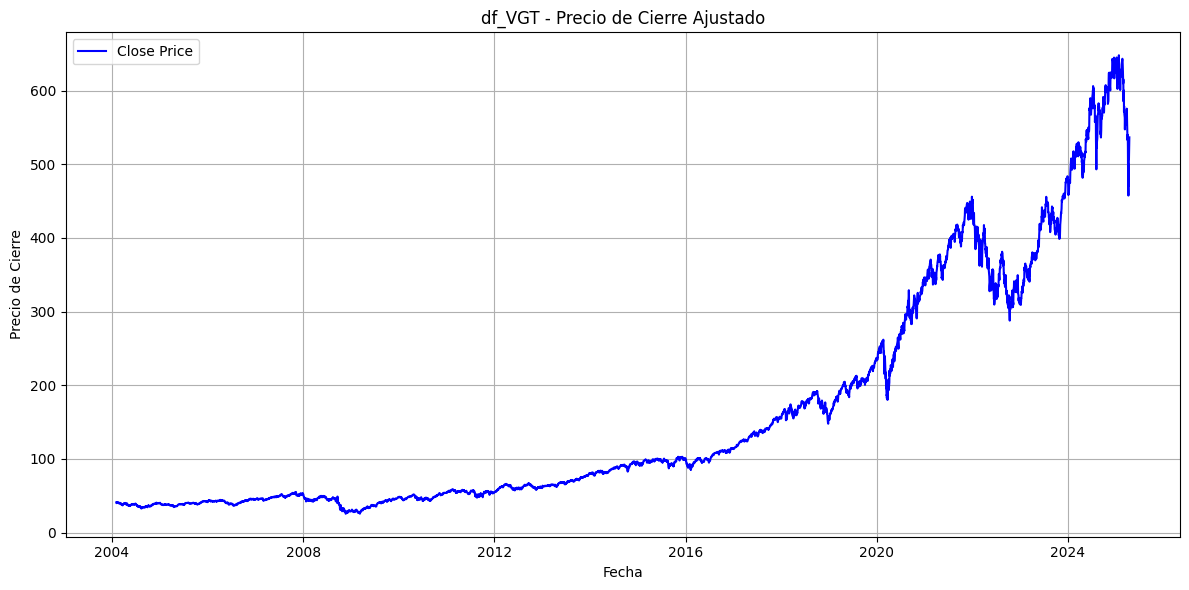

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df_VGT = pd.read_csv('VGT_historico.csv')

# Eliminar las tres últimas columnas del DataFrame
df_VGT = df_VGT.iloc[:, :-3]

# Renombrar las columnas
df_VGT.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Eliminar las filas 0 y 1
df_VGT = df_VGT.drop([0, 1]).reset_index(drop=True)

# Convertir la columna 'Date' a datetime forzando el uso de UTC
df_VGT['Date'] = pd.to_datetime(df_VGT['Date'], errors='coerce', utc=True)

# Convertir los datetimes *tz-aware* a datetimes *naive* (sin zona horaria)
df_VGT['Date'] = df_VGT['Date'].dt.tz_convert(None)

# Función para limpiar y escalar los valores numéricos
def clean_and_scale(value):
    # Eliminar separadores de miles (puntos y comas)
    value = str(value).replace('.', '').replace(',', '')
    # Convertir a float
    value = float(value)
    # Escalar el valor para que tenga solo tres números enteros
    while value >= 1000:  
        value /= 10
    # Si el valor escalado es menor a 100, reducirlo según tu lógica
    if value < 100:
        value /= 10
    return round(value, 2)

# Aplicar la función a las columnas numéricas
for col in ['Close', 'High', 'Low', 'Open']:
    df_VGT[col] = df_VGT[col].apply(clean_and_scale)

# Condición final:
# Para filas anteriores al año 2016, si en las columnas Open, High, Low o Close el valor es superior a 250, se divide entre 10.
mask = df_VGT['Date'] < pd.to_datetime("2018-01-01")
for col in ['Open', 'High', 'Low', 'Close']:
    df_VGT.loc[mask & (df_VGT[col] > 250), col] = df_VGT.loc[mask & (df_VGT[col] > 250), col] / 10

# Verificar la conversión de 'Date'
print("Tipo de 'Date':", df_VGT['Date'].dtype)
print(df_VGT['Date'].head())

# Guardar el DataFrame en un archivo CSV
df_VGT.to_csv("df_VGT.csv", sep=';', decimal=',', index=False, encoding='utf-8')
print("El DataFrame df_VGT se ha guardado como 'df_VGT.csv'.")

# Graficar el precio de cierre (Close) a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_VGT['Date'], df_VGT['Close'], label='Close Price', color='blue')
plt.title('df_VGT - Precio de Cierre Ajustado')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

